# KENYAN ELECTIONS ANALYSIS USING MACHINE LEARNING

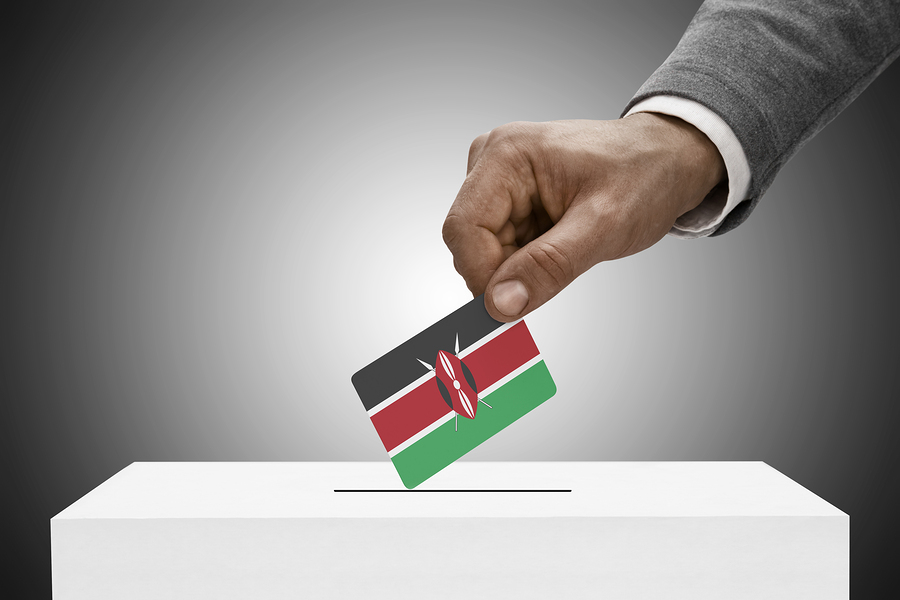

# 1. DEFINING THE QUESTION

### a) Specifying the Question

This project will entail three parts. In the first part,  we will analyze how the messages from presidential candidates affect their image and eventually their voter popularity. We seek to analyze the different phrases used by the presidential aspirants affect the common mwananchi in a positive and negative way. This analysis can give a list of phrases that should be avoided and those that can be used to boost one’s popularity.

The second aspect of this project is to analyze the qualities that can be associated with a good leader. We are going to analyze, through people’s sentiments, what are the most popular qualities that the public would wish to see in their leaders and what they want most from them. Is it good roads, reduction of commodities, more schools to be built, among others.

The last and most sensitive part is to analyze which presidential candidate will win and by what margin. This part will not be for public consumption. We intend to hand this part of the project to a company such as Ipsos so that they can integrate it in their analysis. Access to this information will be restricted to a few people.



### b) Defining the Metric for Success

This analysis requires us to to find out how the presidential candidates images and the public opinion affect the final presidential outcome.

### c) Understanding the context

The upcoming 9th August 2022 kenyan elections has created an uproar on twitter as the citizens post tweets and comments on matters concerning the presidential candidates.

This analysis aims at trying to predict who will win the current elections from the public opinon's view on the candidates in play by use of K-Means clustering.

### d). Recording the Experimental Design

- Data Scrapping
- Data Loading 
- Data Cleaning
- Data Understanding
- Data Relevance
- External Dataset Validation
- Data Preparation
- Descriptive analysis
- Modeling
- Implementation of the solution

### e) Data Relevance

The dataset to use for this project can be found by following this link:
 LINK TO BE PROVIDED


Assumptions

We shall assume the data is accurate



# 2. IMPORTING THE LIBRARIES

In [2]:
# importing the libraries that we will nned
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import glob
import tweepy as tw
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from warnings import filterwarnings
filterwarnings('ignore')
from importlib import reload
plt=reload(plt)
%matplotlib inline

# 3. SCRAPPING DATA FROM TWITTER

In [ ]:
# Connecting to your Twitter Developer APIs

api_key=''  # used to identify and authenticate an application or user
api_secret='' # used for authentication in the most critical parts of the system where access should be limited
access_token='' # used in token-based authentication to allow an application to access an API
access_token_secret='' # used to specify the Twitter account the request is made on behalf of

In [ ]:
# Authenticating the APIs
auth = tw.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [ ]:
# Function to get related tweets
def get_related_tweets(key_word):
    tweet_id = []
    tweet_time = []
    tweet_string = []
    retweet_count = [] 
    for tweet in tw.Cursor(api.search,q=key_word, count=50000).items(50000):
      if tweet.lang == "en":
              tweet_id.append(tweet.id)
              tweet_time.append(tweet.created_at)
              tweet_string.append(tweet.text)
              retweet_count.append(tweet.retweet_count)

    # Creating a DataFrame and storing the retrieved tweets               
    df = pd.DataFrame({'tweet_id': tweet_id, 'time': tweet_time, 'tweet': tweet_string, 'retweet_count':tweet.in_reply_to_status_id_str})
    # Writing the retreieved tweets to CSV
    df.to_csv(f"{key_word}.csv")
    return df
# Creating a list of the keywords we want to use
list_of_search = ['azimio', 'kenya kwanza', 'ruto', 'raila', 'wajackoyah', 'hustler nation', 
                  'roots party', 'baba the 5th', 'kenya 5th president', 'kenyan politics']
# Looping through the list to retrieve tweets related to the respective keyword
for i in list_of_search:
  get_related_tweets(i)

## 4. READING DATASETS AND CONCATINATING THEM INTO ONE DATAFRAME

In [ ]:
# current directory csv files
csvs = [x for x in os.listdir('.') if x.endswith('.csv')]
# stats.csv -> stats
fns = [os.path.splitext(os.path.basename(x))[0] for x in csvs]
# dictionary to store all the csv files
elections = {}
for i in range(len(fns)):
    elections[fns[i]] = pd.read_csv(csvs[i], lineterminator='\n')
# concating all the dataframes into one large dataframe
df = pd.concat((pd.read_csv(csvs[i], lineterminator='\n') for i in range(len(fns)))).reset_index(drop = True) 
print(df)

        Unnamed: 0      tweet_id                 time  \
0                0  1.540065e+18  2022-06-23 20:12:35   
1                1  1.540065e+18  2022-06-23 20:12:16   
2                2  1.540065e+18  2022-06-23 20:12:05   
3                3  1.540065e+18  2022-06-23 20:11:24   
4                4  1.540065e+18  2022-06-23 20:11:20   
...            ...           ...                  ...   
590502        1441  1.536682e+18  2022-06-14 12:06:57   
590503        1442  1.536678e+18  2022-06-14 11:50:58   
590504        1443  1.536674e+18  2022-06-14 11:38:19   
590505        1444  1.536672e+18  2022-06-14 11:29:18   
590506        1445  1.536664e+18  2022-06-14 10:58:59   

                                                    tweet  retweet_count  id  \
0       Wajackoyah tells Ruto to retire with Uhuru via...            0.0 NaN   
1       Wajackoyah tells Ruto to retire with Uhuru htt...            0.0 NaN   
2       @ettie_Jey @D_Rryan @Hon_wajackoyah_ Even Uhur...            0.0 Na

#5. DATA PREPARATION

### checking info of our dataset

In [ ]:
# Checking the information of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590507 entries, 0 to 590506
Data columns (total 42 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       590507 non-null  int64  
 1   tweet_id         432887 non-null  float64
 2   time             432887 non-null  object 
 3   tweet            590507 non-null  object 
 4   retweet_count    432887 non-null  float64
 5   id               157620 non-null  float64
 6   conversation_id  157620 non-null  float64
 7   created_at       157620 non-null  float64
 8   date             157620 non-null  object 
 9   timezone         157620 non-null  float64
 10  place            117 non-null     object 
 11  language         157620 non-null  object 
 12  hashtags         157620 non-null  object 
 13  cashtags         157620 non-null  object 
 14  user_id          157620 non-null  float64
 15  user_id_str      157620 non-null  float64
 16  username         157620 non-null  obje

In [ ]:
# checking the number of entries and attributes in our dataset
df.shape

(590507, 42)

Our dataset has a total of 590,564 entries. 
We will drop most of the columns because we do not require them in our analysis. The only columns that we will keep are Tweet_id, Date, Tweet, and Retweet_count.

### Excluding the unwanted columns from our dataset

In [ ]:
# dropping the columns that are not necessary in our analysis
# df = df.drop(['Unnamed: 0','tweet_id', 'id', 'conversation_id', 'user_id', 'user_id_str', 
# 'place','near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'retweet_date', 'translate', 'trans_src', 'trans_dest'], axis=1)
# df.head()

# we will keep columns 'tweet_id','time', 'tweet', 'retweet_count'
df = df[['tweet_id','time', 'tweet', 'retweet_count']]
df.sample(20)

,tweet_id,time,tweet,retweet_count
132838,1.537664e+18,2022-06-17 05:11:23,Mulembe nation promises to support Kenya Kwanz...,0.0
197488,1.540028e+18,2022-06-23 17:43:23,RT @AokoOtieno_: @OleItumbi Wale mnapiga kelel...,76.0
94377,1.540051e+18,2022-06-23 19:15:03,RT @WilliamsRuto: During the Kenya Kwanza Educ...,199.0
189238,NaN,NaN,When Sakaja was working for the other side he ...,NaN
397995,1.542128e+18,2022-06-29 12:47:51,@WilliamsRuto https://t.co/XLR3GQQRH5,0.0
161380,1.539608e+18,2022-06-22 13:56:20,I will vote for Raila Odinga since the uhuruto...,0.0
175672,1.539246e+18,2022-06-21 13:57:41,RT @NelsonHavi: The Omulembe Nation has said n...,146.0
120939,1.538435e+18,2022-06-19 08:15:12,RT @NationAfrica: Police seal off Jacaranda gr...,24.0
211768,1.539680e+18,2022-06-22 18:40:44,RT @Honcalebamisi: Saboti women have decided i...,12.0
298132,NaN,NaN,isn’t this like the 5th time,NaN


# **DATA CLEANING**

### checking for missing values

In [ ]:
# checking if there are any missing values in the dataset
df.isnull().sum()

tweet_id         157620
time             157620
tweet                 0
retweet_count    157620
dtype: int64

In [ ]:
# finding the percentage of missing values for each column
percent_missing = round(df.isnull().sum() * 100 / len(df),2)
percent_missing

tweet_id         26.69
time             26.69
tweet             0.00
retweet_count    26.69
dtype: float64

In [ ]:
# finding the percentage of missing values for the entire dataset
percentage_missing = round(df.isnull().sum().sum() * 100 / len(df),2)
percentage_missing

80.08

There seems to be many missing values. For each column, this is how we will impute the missing values:

tweet_id: We will drop the missing values since this is a unique identifier, and you cannot impute it. It should be generated from Twitter.

time: We will impute the missing values using backfill.

tweet: We will drop the missing values here, since the tweet is the sentiment shared by an individual. 

retweet_count: We will fill the missing values with '0.



In [ ]:
# dropping the missing values in tweet_id
df.dropna(subset=['tweet_id'], inplace=True)

While dropping the missing values in the tweet_id column, the tweets with missing values also got dropped. 

In [ ]:
# forward filling and backward filling the dates that are missing in our dataset
df['time'] = df['time'].ffill().bfill()

In [ ]:
# filling '0' in the missing values in our retweet_count column
df['retweet_count'] = df['retweet_count'].fillna(0)

In [ ]:
# checking to see if the missing values have been imputed
df.isnull().sum()

tweet_id         0
time             0
tweet            0
retweet_count    0
dtype: int64

Retweet_count column has some object values which should be dealt with and the dtype changed to float.
Time column should be in date time format.

In [ ]:
# checking the datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432887 entries, 0 to 590506
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   tweet_id       432887 non-null  float64
 1   time           432887 non-null  object 
 2   tweet          432887 non-null  object 
 3   retweet_count  432887 non-null  float64
dtypes: float64(2), object(2)
memory usage: 16.5+ MB


In [ ]:
# changing the datatype of retweet_count and time to their respective datatypes
df['retweet_count'] = df['retweet_count'].astype('int')
df['time'] = pd.to_datetime(df['time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432887 entries, 0 to 590506
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   tweet_id       432887 non-null  float64       
 1   time           432887 non-null  datetime64[ns]
 2   tweet          432887 non-null  object        
 3   retweet_count  432887 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 16.5+ MB


#### checking duplicates

In [ ]:
# checking if we have duplicates in our 'tweet_id' column since it is out unique identifier
df['tweet_id'].duplicated().sum()

56240

The 'tweet_id' column has 58,950 duplicates. We will drop them.

In [ ]:
# dropping the duplicates in the tweet_id column
df.drop_duplicates(subset=['tweet_id'], keep='last', inplace=True)

### checking for cardinality

In [ ]:
# Number of unique values in the elections dataset
print('Cardinality of the dataset columns:\n')
for i in df.columns:
  print(f'{i:<5} : {df[i].nunique()}')

Cardinality of the dataset columns:

tweet_id : 376647
time  : 315182
tweet : 263466
retweet_count : 800


In [ ]:
# checking the shape of our final dataset
df.shape

(376647, 4)

In [ ]:
# saving the cleaned dataset to a csv file
df.to_csv('cleaned_df.csv')

## Exploratory Data Analysis

In [4]:
clean_df = pd.read_csv('cleaned_df_amos.csv')

In [5]:
# Creating a Function to clean the tweets further

import re

def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9_]+','',str(text)) # Removing @mentions
  text = re.sub(r'#','',str(text)) # Removing the '#' symbol
  text = re.sub(r'RT[\s]+','',str(text))  # Removing RT
  text = re.sub(r'https?:\/\/\S+', '',str(text)) # Removing the hyper link
  text = re.sub(r':', '',str(text)) # Removing the ':'
  text = re.sub(r';', '',str(text)) # Removing the ';'
  text = re.sub(r'\n', '',str(text)) # Removing the '\n'
  text = re.sub(r'1', '',str(text)) # Removing the '1'
  text = re.sub(r'_', '',str(text)) # Removing the '1'

  return text

clean_df['tweet'] = clean_df['tweet'].apply(cleanTxt)

# Showing cleaned text

clean_df.head()

,Unnamed: 0,Unnamed: 0.1,tweet_id,time,tweet,retweet_count
0,1,1,1543382261164302337,2022-07-02 23:53:00,Hii ndio ubaya ya kukosa degre😂😂😂. being Azi...,0
1,2,2,1543379565648773121,2022-07-02 23:42:17,Mathira MP Rigathi Gachagua says Azimio la Umo...,0
2,5,5,1543377927773081603,2022-07-02 23:35:47,Azimio la wezi,0
3,6,6,1543377130201006084,2022-07-02 23:32:37,Uhuru is the Azimio candidate. Are you visit...,0
4,7,7,1543377046105120770,2022-07-02 23:32:17,Hivyo ndivyo naingia Azimio. Kwanza hii stor...,0


In [6]:
clean_df.shape

(405650, 6)

In [ ]:
#!pip install textblob

In [7]:
from textblob import TextBlob

# Creating a function to get the subjectivity

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity


# Creating a function to get polarity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Creating two additional columns to check the Subjectivity and Polarity

clean_df['Subjectivity'] = clean_df['tweet'].apply(getSubjectivity)
clean_df['Polarity'] = clean_df['tweet'].apply(getPolarity)

# Checking the dataframe

clean_df.head()


,Unnamed: 0,Unnamed: 0.1,tweet_id,time,tweet,retweet_count,Subjectivity,Polarity
0,1,1,1543382261164302337,2022-07-02 23:53:00,Hii ndio ubaya ya kukosa degre😂😂😂. being Azi...,0,0.000000,0.000000
1,2,2,1543379565648773121,2022-07-02 23:42:17,Mathira MP Rigathi Gachagua says Azimio la Umo...,0,0.000000,0.000000
2,5,5,1543377927773081603,2022-07-02 23:35:47,Azimio la wezi,0,0.000000,0.000000
3,6,6,1543377130201006084,2022-07-02 23:32:37,Uhuru is the Azimio candidate. Are you visit...,0,0.000000,0.000000
4,7,7,1543377046105120770,2022-07-02 23:32:17,Hivyo ndivyo naingia Azimio. Kwanza hii stor...,0,0.362963,0.181481


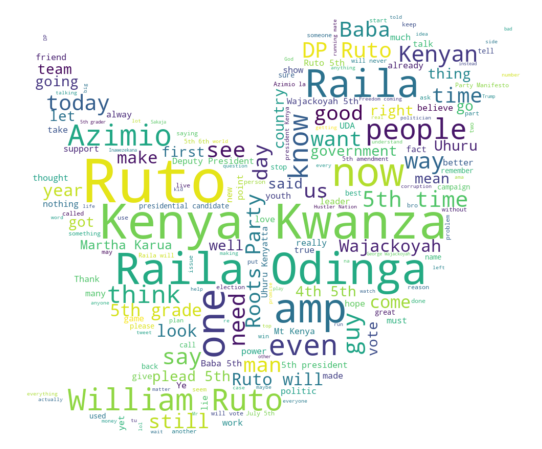

In [15]:
# Plotting Word Cloud 

from wordcloud import WordCloud, STOPWORDS
from PIL import Image,ImageFont


stopwords = set(STOPWORDS)

mask = np.array(Image.open("twitter-logo.png"))

allWords = ' '.join([twts for twts in clean_df['tweet']])

wordCloud = WordCloud(width = 1000, height = 600, random_state = 43, max_font_size = 119,
                    mask = mask,background_color='white',stopwords = stopwords).generate(allWords)

plt.figure( figsize = (16,8))
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [8]:
# Creating a function to compute the negative, neutral and positive sentiments in our data

def getAnalysis(score):
  if score < 0: 
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'    

# Creating another feature called Analysis to store the scores

clean_df['Analysis'] = clean_df['Polarity'].apply(getAnalysis) 

# Checking the data

clean_df.head()

,Unnamed: 0,Unnamed: 0.1,tweet_id,time,tweet,retweet_count,Subjectivity,Polarity,Analysis
0,1,1,1543382261164302337,2022-07-02 23:53:00,Hii ndio ubaya ya kukosa degre😂😂😂. being Azi...,0,0.000000,0.000000,Neutral
1,2,2,1543379565648773121,2022-07-02 23:42:17,Mathira MP Rigathi Gachagua says Azimio la Umo...,0,0.000000,0.000000,Neutral
2,5,5,1543377927773081603,2022-07-02 23:35:47,Azimio la wezi,0,0.000000,0.000000,Neutral
3,6,6,1543377130201006084,2022-07-02 23:32:37,Uhuru is the Azimio candidate. Are you visit...,0,0.000000,0.000000,Neutral
4,7,7,1543377046105120770,2022-07-02 23:32:17,Hivyo ndivyo naingia Azimio. Kwanza hii stor...,0,0.362963,0.181481,Positive


In [11]:
# Printing all the Positive tweets

j = 1

sort_df = clean_df.sort_values(by='Polarity')
for i in range(0, 50):
  if (sort_df['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+sort_df['tweet'][i])
    print()
    j = j+1

1)   Hivyo ndivyo naingia Azimio. Kwanza hii story ya ku scale down infrastructure ni ujinga. When need to build more modern and quality infrastructure.

2) Today, Mama  will be making a whirlwind tour of the City County to wipe away the yellow fever and preach the good news of Azimio     

3)  Please could you talk on your behalf. Murathe known of bankrupt in 207 but when covid hit us he became super rich.Who followed his source of wealth?  No one.He is said to be involved with kemsa heist Now you are here holier-than-thou talking AZIMIO zero- tolerance to corruption

4)  It is all government services. No one cares. That is what the Azimio government has reduced Kenyans to. Uhuru will only whine "ng'we ng'we" like the rest of us. We are on our own.

5) Before i make comment, i wish i get the exact words he used preferably in a vedio clip. Nation media in campaign, supporting Azimio with all they can. State sponsored media headline and pushed bloggers. RejectRailaOdinga Uhuru Kenyatta 

In [12]:
# Printing all the Negative tweets

j = 1

sort_df = clean_df.sort_values(by='Polarity', ascending = 'False')
for i in range(0, 50):
  if (sort_df['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sort_df['tweet'][i])
    print()
    j = j+1

1) The similarities between the merchant of Venice and the merchant of Sugoi is the Sugoi merchant is the one who is bitter, resentful and seeking revenge. He cannot be trusted with leadership because he’s not calm and collected. He needs about 40 years in the wilderness. azimio

2)   You seem aged but you have no wisdom.  Who started Matusi hapa? So DP coz ni DP any amaze akitusiwa na chairman wa Azimio? Because the president can't speak like that,  he is not vying... So the one who spoke today was not the "president" but Azimio chairman

3)  Time for you guys to take responsibility &amp justify earning a salary for years from us hardworking tax payers... no excuses Sir - just show us your track record.  And because we are tired of your endless yapping and politics of deceit, we are voting Azimio 💙💙💙

4)  foreign economies instead.  It is therefore critical that Azimio sees to it that Kshs6000/per head of a poor Kenyan is actualized, to boost the country's economy. If not, the wealthy

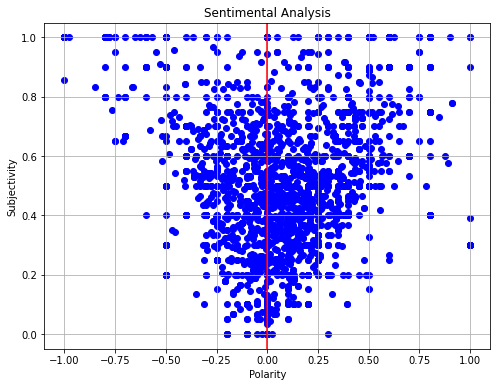

In [ ]:
# Plotting the Polarity and Subjectivity

plt.figure(figsize = (8,6))
for i in range(0,5000):
  plt.scatter(clean_df['Polarity'][i],clean_df['Subjectivity'][i], color = 'Blue')

plt.title('Sentimental Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.grid('on')
plt.axvline(x=0,ymin=0,ymax=1,color='red')
plt.show()  

In [17]:
# Getting the Percentage of Positive tweets

pos_tweets = clean_df[clean_df.Analysis == 'Positive']
pos_tweets = pos_tweets['tweet']

print(f"We have {round((pos_tweets.shape[0]/clean_df.shape[0])*100,1)}% positive tweets")


We have 31.6% positive tweets


In [18]:
# Getting the Percentage of Negative tweets

neg_tweets = clean_df[clean_df.Analysis == 'Negative']
neg_tweets = neg_tweets['tweet']

print(f"We have {round((neg_tweets.shape[0]/clean_df.shape[0])*100,1)}% negative tweets")

We have 15.2% negative tweets


In [19]:
# Getting the Percentage of Neutral tweets

neutral_tweets = clean_df[clean_df.Analysis == 'Neutral']
neutral_tweets = neutral_tweets['tweet']

print(f"We have {round((neutral_tweets.shape[0]/clean_df.shape[0])*100,1)}% neutral tweets")

We have 53.2% neutral tweets


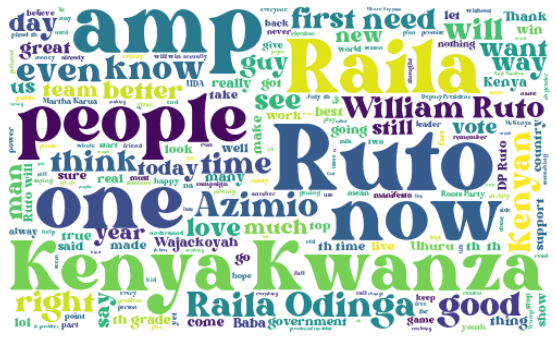

In [21]:
# Plotting Word Cloud for Positive sentiments

stopwords = set(STOPWORDS)

font_path = 'Bright DEMO.otf'

post_Words = ' '.join([twts for twts in pos_tweets])

wordCloud = WordCloud(width = 500, height = 300, random_state = 16, max_font_size = 119,background_color='white',stopwords=STOPWORDS,font_path=font_path).generate(post_Words)

plt.figure( figsize = (14,6))
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

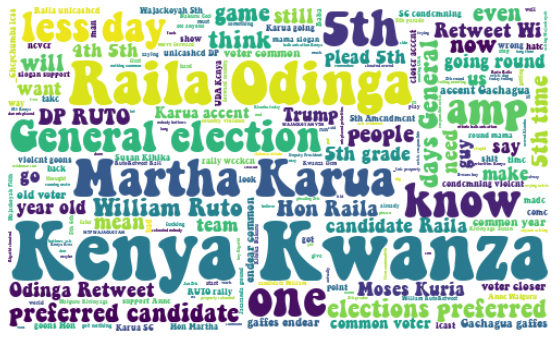

In [ ]:
# Plotting Word Cloud for Negative sentiments

stopwords = set(STOPWORDS)

font_path = 'KeeponTruckin.ttf'

negt_words = ' '.join([twts for twts in neg_tweets])

wordCloud = WordCloud(width = 500, height = 300, random_state = 67, max_font_size = 119,background_color='white',stopwords=STOPWORDS,font_path=font_path).generate(negt_words)

plt.figure( figsize = (14,6))
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

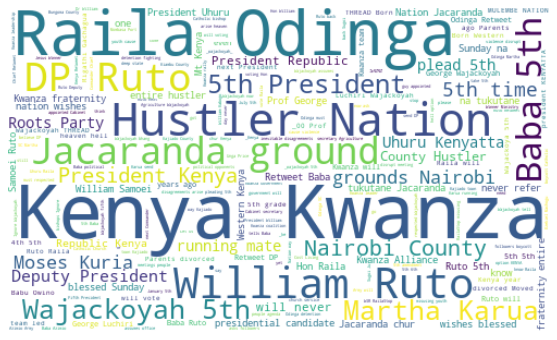

In [ ]:
# Plotting Word Cloud for Neutral sentiments

stopwords = set(STOPWORDS)

neutral_words = ' '.join([twts for twts in neutral_tweets])

wordCloud = WordCloud(width = 500, height = 300, random_state = 16, max_font_size = 119,background_color='white',stopwords=STOPWORDS).generate(neutral_words)

plt.figure( figsize = (14,6))
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

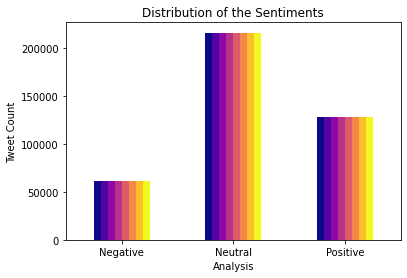

In [25]:
# Plotting the distribution for dataset.

ax = clean_df.groupby('Analysis').count().plot(kind='bar', title='Distribution of the Sentiments',legend=False, cmap='plasma')
ax.set_xticklabels(['Negative','Neutral','Positive'], rotation=0)
ax.set_ylabel('Tweet Count')
plt.show()

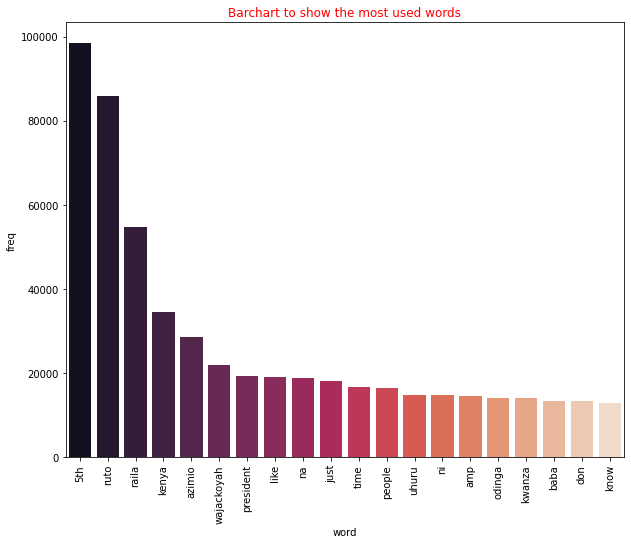

In [22]:
# Checking the Most used individual words

from sklearn.feature_extraction.text  import CountVectorizer
import collections

cv = CountVectorizer(stop_words='english')
bow = cv.fit_transform(clean_df['tweet'])
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(20), columns = ['word', 'freq'])
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x="word", y="freq", data=word_counter_df, palette="rocket", ax=ax)
plt.xticks(rotation=90)
plt.title('Barchart to show the most used words',color='red')
plt.show()

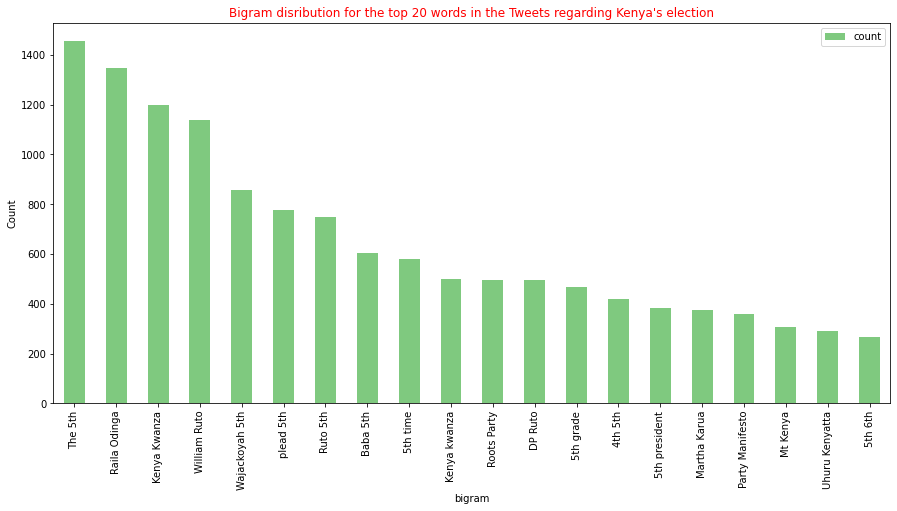

In [23]:
# Checking for Most used two words

#Converting text descriptions into vectors using TF-IDF using Bigram

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(clean_df['tweet'])
total_words = tfidf_matrix.sum(axis=0)
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True)
#Taking first 20 records
bigram = bigram.head(20)
#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', figsize = (15,7),cmap='Accent')
plt.title("Bigram disribution for the top 20 words in the Tweets regarding Kenya's election", color = 'red')
plt.ylabel('Count')
plt.show()